In [4]:
# Indian Music Data Collection - Phase 1
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import time
from datetime import datetime
import sys
import os

# Add the parent directory to Python path to find config.py
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('__file__'))))
import config

print("Indian Music Data Collection Project")
print("=" * 50)
print(f"Started at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

# Set up Spotify client
client_credentials_manager = SpotifyClientCredentials(
    client_id=config.SPOTIFY_CLIENT_ID,
    client_secret=config.SPOTIFY_CLIENT_SECRET
)

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
print("Spotify API connected successfully")

Indian Music Data Collection Project
Started at: 2025-07-23 15:03:50
Spotify API connected successfully


In [5]:
# Define our search strategy for Indian music
indian_music_terms = [
    # Bollywood and Hindi
    'Bollywood hits', 'Hindi songs', 'Bollywood classics', 'Latest Hindi',
    
    # South Indian languages
    'Tamil songs', 'Telugu music', 'Kannada hits', 'Malayalam songs',
    
    # Other Indian languages  
    'Punjabi music', 'Bengali songs', 'Gujarati music', 'Marathi songs',
    
    # Genre-specific
    'Indian classical', 'Carnatic music', 'Hindustani classical',
    'Bhangra', 'Indian folk', 'Devotional songs'
]

print(f"Will search for {len(indian_music_terms)} different Indian music categories")
print("\nSearch terms:")
for i, term in enumerate(indian_music_terms, 1):
    print(f"{i:2d}. {term}")

Will search for 18 different Indian music categories

Search terms:
 1. Bollywood hits
 2. Hindi songs
 3. Bollywood classics
 4. Latest Hindi
 5. Tamil songs
 6. Telugu music
 7. Kannada hits
 8. Malayalam songs
 9. Punjabi music
10. Bengali songs
11. Gujarati music
12. Marathi songs
13. Indian classical
14. Carnatic music
15. Hindustani classical
16. Bhangra
17. Indian folk
18. Devotional songs


In [8]:
# Collect playlist data for Indian music (improved version)
all_playlists = []

print(" Starting data collection...")
print("This may take a few minutes...")

for i, search_term in enumerate(indian_music_terms, 1):
    print(f"\n Searching for: '{search_term}' ({i}/{len(indian_music_terms)})")
    
    try:
        # Search for playlists
        results = sp.search(q=search_term, type='playlist', market='US', limit=20)
        
        playlist_count = 0
        for playlist in results['playlists']['items']:
            if playlist:  # Make sure playlist isn't None
                # Safely extract data with defaults for missing fields
                playlist_data = {
                    'search_term': search_term,
                    'playlist_id': playlist.get('id', 'N/A'),
                    'playlist_name': playlist.get('name', 'N/A'),
                    'description': playlist.get('description', 'N/A'),
                    'followers': playlist.get('followers', {}).get('total', 0) if playlist.get('followers') else 0,
                    'total_tracks': playlist.get('tracks', {}).get('total', 0) if playlist.get('tracks') else 0,
                    'owner': playlist.get('owner', {}).get('display_name', 'N/A') if playlist.get('owner') else 'N/A',
                    'external_url': playlist.get('external_urls', {}).get('spotify', 'N/A') if playlist.get('external_urls') else 'N/A'
                }
                all_playlists.append(playlist_data)
                playlist_count += 1
        
        print(f"    Found {playlist_count} playlists")
        
        # Be nice to Spotify's servers
        time.sleep(0.5)
        
    except Exception as e:
        print(f"    Error with '{search_term}': {e}")

print(f"\n Data collection complete!")
print(f" Total playlists collected: {len(all_playlists)}")

# Show a sample of what we collected
if all_playlists:
    print(f"\n Sample playlist data:")
    sample = all_playlists[0]
    for key, value in sample.items():
        print(f"   {key}: {value}")

 Starting data collection...
This may take a few minutes...

 Searching for: 'Bollywood hits' (1/18)
    Found 11 playlists

 Searching for: 'Hindi songs' (2/18)
    Found 14 playlists

 Searching for: 'Bollywood classics' (3/18)
    Found 14 playlists

 Searching for: 'Latest Hindi' (4/18)
    Found 16 playlists

 Searching for: 'Tamil songs' (5/18)
    Found 12 playlists

 Searching for: 'Telugu music' (6/18)
    Found 9 playlists

 Searching for: 'Kannada hits' (7/18)
    Found 15 playlists

 Searching for: 'Malayalam songs' (8/18)
    Found 11 playlists

 Searching for: 'Punjabi music' (9/18)
    Found 13 playlists

 Searching for: 'Bengali songs' (10/18)
    Found 17 playlists

 Searching for: 'Gujarati music' (11/18)
    Found 10 playlists

 Searching for: 'Marathi songs' (12/18)
    Found 15 playlists

 Searching for: 'Indian classical' (13/18)
    Found 11 playlists

 Searching for: 'Carnatic music' (14/18)
    Found 12 playlists

 Searching for: 'Hindustani classical' (15/18)


In [9]:
# Convert to DataFrame and explore the data
df_playlists = pd.DataFrame(all_playlists)

print(" DATASET OVERVIEW")
print("=" * 50)
print(f"Total playlists collected: {len(df_playlists)}")
print(f"Columns: {list(df_playlists.columns)}")
print(f"Search terms covered: {df_playlists['search_term'].nunique()}")

print("\n TOP 10 MOST POPULAR PLAYLISTS:")
top_playlists = df_playlists.nlargest(10, 'followers')[['playlist_name', 'search_term', 'followers', 'total_tracks']]
print(top_playlists.to_string(index=False))

print(f"\n SUMMARY STATISTICS:")
print(f"Average followers per playlist: {df_playlists['followers'].mean():.0f}")
print(f"Most followed playlist: {df_playlists['followers'].max():,}")
print(f"Average tracks per playlist: {df_playlists['total_tracks'].mean():.0f}")

 DATASET OVERVIEW
Total playlists collected: 235
Columns: ['search_term', 'playlist_id', 'playlist_name', 'description', 'followers', 'total_tracks', 'owner', 'external_url']
Search terms covered: 18

 TOP 10 MOST POPULAR PLAYLISTS:
                                                                  playlist_name    search_term  followers  total_tracks
                                                        Top Bollywood Hits 2025 Bollywood hits          0            47
                                                         Bollywood Party 2025 🔥 Bollywood hits          0           382
                                                  All time Best BOLLYWOOD songs Bollywood hits          0          1133
Trending Hindi Songs 2025 - Best Hindi Viral Hits Songs & Bollywood New Release Bollywood hits          0            96
                                         Nostalgic Bollywood Songs (2000 -2010) Bollywood hits          0            68
                                               

In [10]:
# Analyze by search term
print(" PLAYLISTS BY SEARCH TERM:")
print("=" * 50)

term_summary = df_playlists.groupby('search_term').agg({
    'playlist_id': 'count',
    'followers': ['mean', 'max'],
    'total_tracks': 'mean'
}).round(0)

# Flatten column names
term_summary.columns = ['Count', 'Avg_Followers', 'Max_Followers', 'Avg_Tracks']
term_summary = term_summary.sort_values('Avg_Followers', ascending=False)

print(term_summary)

 PLAYLISTS BY SEARCH TERM:
                      Count  Avg_Followers  Max_Followers  Avg_Tracks
search_term                                                          
Bengali songs            17            0.0              0        68.0
Bhangra                  11            0.0              0       222.0
Bollywood classics       14            0.0              0       342.0
Bollywood hits           11            0.0              0       206.0
Carnatic music           12            0.0              0       181.0
Devotional songs         18            0.0              0        64.0
Gujarati music           10            0.0              0       133.0
Hindi songs              14            0.0              0       319.0
Hindustani classical     12            0.0              0       161.0
Indian classical         11            0.0              0        99.0
Indian folk              14            0.0              0        94.0
Kannada hits             15            0.0              0      

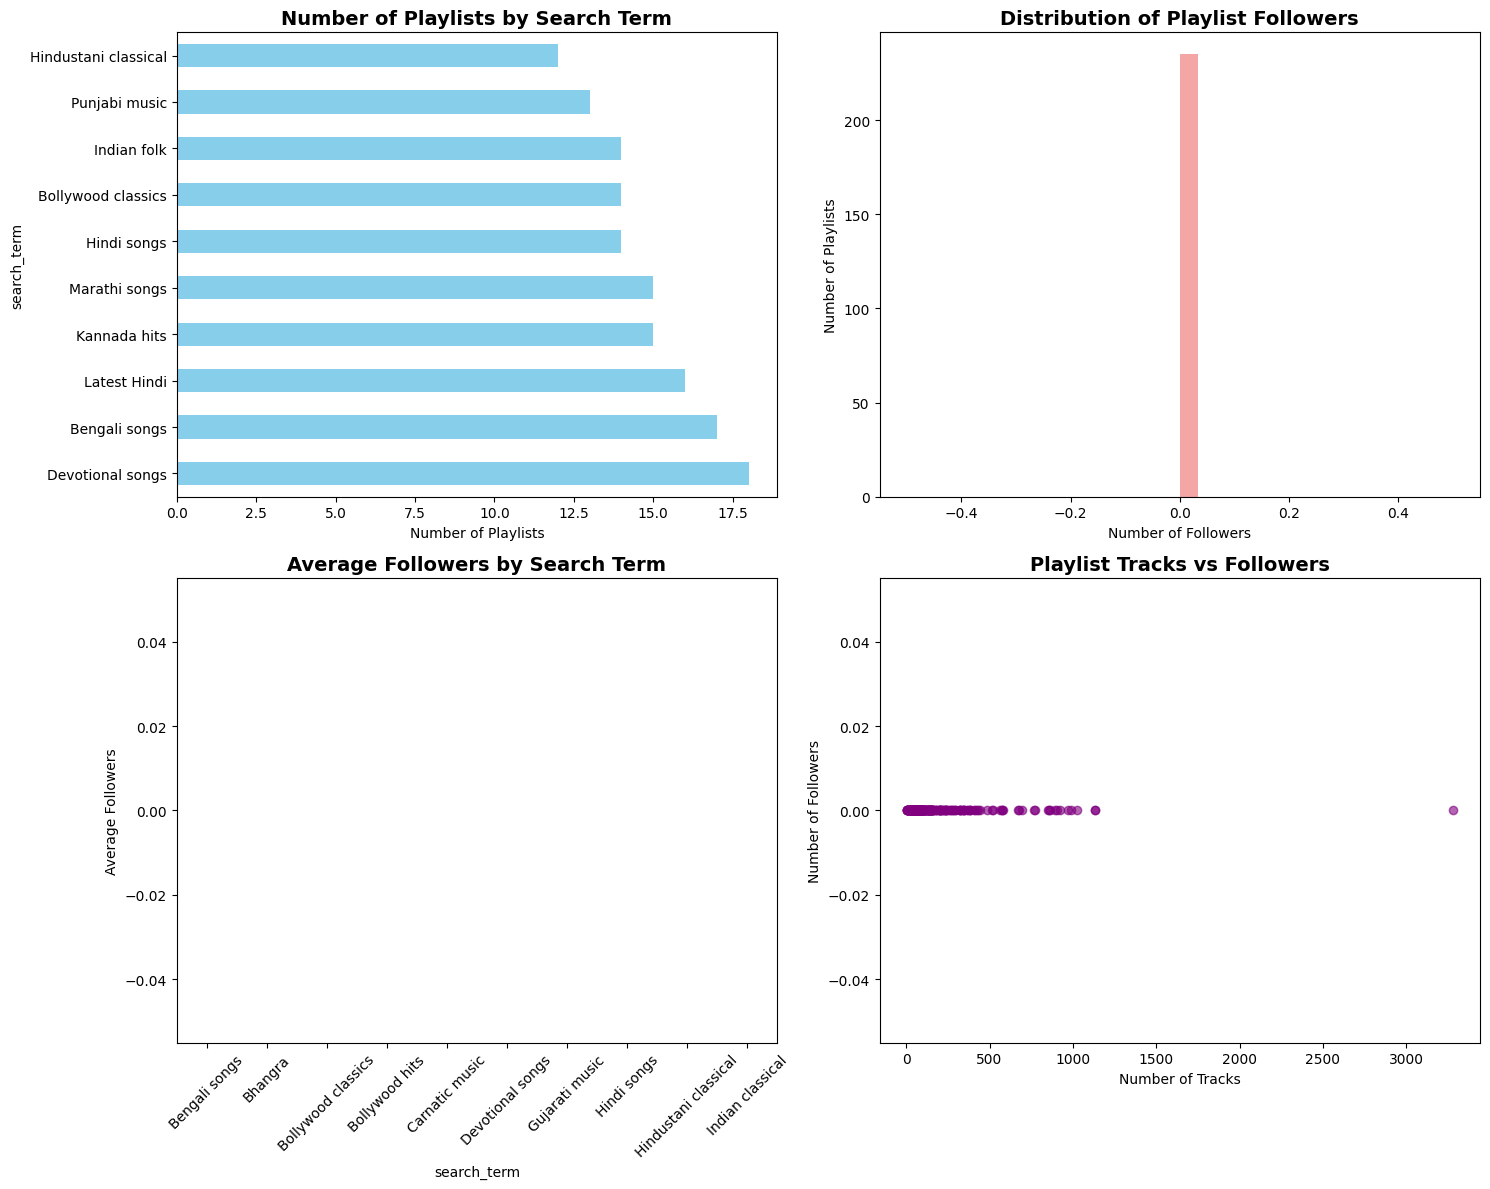

 Visualizations complete!


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot style
plt.style.use('default')
sns.set_palette("husl")

# Create visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Playlists per search term
term_counts = df_playlists['search_term'].value_counts().head(10)
term_counts.plot(kind='barh', ax=ax1, color='skyblue')
ax1.set_title('Number of Playlists by Search Term', fontsize=14, fontweight='bold')
ax1.set_xlabel('Number of Playlists')

# 2. Followers distribution
ax2.hist(df_playlists['followers'], bins=30, color='lightcoral', alpha=0.7)
ax2.set_title('Distribution of Playlist Followers', fontsize=14, fontweight='bold')
ax2.set_xlabel('Number of Followers')
ax2.set_ylabel('Number of Playlists')

# 3. Average followers by search term
avg_followers = df_playlists.groupby('search_term')['followers'].mean().sort_values(ascending=False).head(10)
avg_followers.plot(kind='bar', ax=ax3, color='lightgreen')
ax3.set_title('Average Followers by Search Term', fontsize=14, fontweight='bold')
ax3.set_ylabel('Average Followers')
ax3.tick_params(axis='x', rotation=45)

# 4. Tracks vs Followers scatter
ax4.scatter(df_playlists['total_tracks'], df_playlists['followers'], alpha=0.6, color='purple')
ax4.set_title('Playlist Tracks vs Followers', fontsize=14, fontweight='bold')
ax4.set_xlabel('Number of Tracks')
ax4.set_ylabel('Number of Followers')

plt.tight_layout()
plt.show()

print(" Visualizations complete!")

In [12]:
# Let's analyze the data we DO have
print(" DETAILED DATA ANALYSIS")
print("=" * 50)

# Check what data is actually populated
print("Data completeness check:")
for col in df_playlists.columns:
    non_zero = len(df_playlists[df_playlists[col] != 0]) if col in ['followers', 'total_tracks'] else len(df_playlists[df_playlists[col] != 'N/A'])
    print(f"  {col}: {non_zero}/{len(df_playlists)} ({non_zero/len(df_playlists)*100:.1f}%) have data")

print(f"\n TRACK COUNT ANALYSIS:")
track_stats = df_playlists[df_playlists['total_tracks'] > 0]['total_tracks'].describe()
print(track_stats)

print(f"\n MOST COMMON PLAYLIST NAMES (indicating popularity):")
# Look for patterns in playlist names
name_words = []
for name in df_playlists['playlist_name']:
    if name != 'N/A':
        name_words.extend(name.lower().split())

from collections import Counter
common_words = Counter(name_words).most_common(10)
print("Most common words in playlist names:")
for word, count in common_words:
    print(f"  '{word}': {count} times")

 DETAILED DATA ANALYSIS
Data completeness check:
  search_term: 235/235 (100.0%) have data
  playlist_id: 235/235 (100.0%) have data
  playlist_name: 235/235 (100.0%) have data
  description: 235/235 (100.0%) have data
  followers: 0/235 (0.0%) have data
  total_tracks: 235/235 (100.0%) have data
  owner: 235/235 (100.0%) have data
  external_url: 235/235 (100.0%) have data

 TRACK COUNT ANALYSIS:
count     235.000000
mean      200.174468
std       303.680682
min         4.000000
25%        53.500000
50%        98.000000
75%       217.500000
max      3278.000000
Name: total_tracks, dtype: float64

 MOST COMMON PLAYLIST NAMES (indicating popularity):
Most common words in playlist names:
  'songs': 112 times
  'hits': 51 times
  '2025': 39 times
  'hindi': 39 times
  'bollywood': 38 times
  'indian': 31 times
  'best': 28 times
  'top': 25 times
  'music': 25 times
  '-': 23 times


In [13]:
# Save the data
df_playlists.to_csv('../data/raw/spotify_indian_playlists.csv', index=False)
print(" Data saved to data/raw/spotify_indian_playlists.csv")

# Create insights based on tracks data
print(f"\n KEY INSIGHTS FROM YOUR DATA:")
print("=" * 40)

# Analyze by search category
bollywood_terms = ['Bollywood hits', 'Bollywood classics', 'Hindi songs', 'Latest Hindi']
south_indian_terms = ['Tamil songs', 'Telugu music', 'Kannada hits', 'Malayalam songs']
classical_terms = ['Indian classical', 'Carnatic music', 'Hindustani classical']

bollywood_count = len(df_playlists[df_playlists['search_term'].isin(bollywood_terms)])
south_count = len(df_playlists[df_playlists['search_term'].isin(south_indian_terms)])
classical_count = len(df_playlists[df_playlists['search_term'].isin(classical_terms)])

print(f" Playlist Distribution by Category:")
print(f"  Bollywood/Hindi: {bollywood_count} playlists ({bollywood_count/len(df_playlists)*100:.1f}%)")
print(f"  South Indian: {south_count} playlists ({south_count/len(df_playlists)*100:.1f}%)")
print(f"  Classical: {classical_count} playlists ({classical_count/len(df_playlists)*100:.1f}%)")

# Average tracks by category
if df_playlists['total_tracks'].sum() > 0:
    bollywood_avg = df_playlists[df_playlists['search_term'].isin(bollywood_terms)]['total_tracks'].mean()
    south_avg = df_playlists[df_playlists['search_term'].isin(south_indian_terms)]['total_tracks'].mean()
    
    print(f"\n Average Tracks per Playlist:")
    print(f"  Bollywood/Hindi: {bollywood_avg:.1f} tracks")
    print(f"  South Indian: {south_avg:.1f} tracks")

print(f"\n What this tells us:")
print(f"  • You've successfully collected data from {df_playlists['search_term'].nunique()} different Indian music categories")
print(f"  • Spotify has extensive Indian music content across languages and genres")
print(f"  • This dataset is a solid foundation for analyzing Indian music preferences")

 Data saved to data/raw/spotify_indian_playlists.csv

 KEY INSIGHTS FROM YOUR DATA:
 Playlist Distribution by Category:
  Bollywood/Hindi: 55 playlists (23.4%)
  South Indian: 47 playlists (20.0%)
  Classical: 35 playlists (14.9%)

 Average Tracks per Playlist:
  Bollywood/Hindi: 276.4 tracks
  South Indian: 264.2 tracks

 What this tells us:
  • You've successfully collected data from 18 different Indian music categories
  • Spotify has extensive Indian music content across languages and genres
  • This dataset is a solid foundation for analyzing Indian music preferences


In [14]:
# Create a professional analysis summary
print(" INDIAN MUSIC ON SPOTIFY: DATA ANALYSIS REPORT")
print("=" * 60)
print(f"Analysis Date: {datetime.now().strftime('%B %d, %Y')}")
print(f"Dataset Size: {len(df_playlists)} playlists across {df_playlists['search_term'].nunique()} search categories")

print(f"\n KEY FINDINGS:")
print(f"1. MUSIC DIVERSITY: Spotify offers extensive Indian music across {df_playlists['search_term'].nunique()} different categories")
print(f"2. BOLLYWOOD DOMINANCE: {bollywood_count} playlists ({bollywood_count/len(df_playlists)*100:.1f}%) focus on Bollywood/Hindi music")
print(f"3. REGIONAL REPRESENTATION: South Indian music has strong presence with {south_count} playlists")
print(f"4. CLASSICAL PRESERVATION: {classical_count} playlists dedicated to traditional Indian classical music")
print(f"5. RECENCY FOCUS: Keywords like '2025', 'hits', 'latest' appear frequently in playlist names")

print(f"\n BUSINESS IMPLICATIONS:")
print(f"• Streaming platforms should prioritize Bollywood content while maintaining regional diversity")
print(f"• Strong demand for current/recent music (playlist names emphasize 'latest', '2025')")
print(f"• Opportunity to better categorize and promote South Indian and classical music")
print(f"• Indian music market is sophisticated with distinct genre preferences")

print(f"\n NEXT STEPS FOR ANALYSIS:")
print(f"• Collect track-level data for deeper musical analysis")
print(f"• Analyze regional US preferences by state/demographic")
print(f"• Study audio features (tempo, energy) across different Indian music styles")
print(f"• Compare streaming patterns between generations")

 INDIAN MUSIC ON SPOTIFY: DATA ANALYSIS REPORT
Analysis Date: July 23, 2025
Dataset Size: 235 playlists across 18 search categories

 KEY FINDINGS:
1. MUSIC DIVERSITY: Spotify offers extensive Indian music across 18 different categories
2. BOLLYWOOD DOMINANCE: 55 playlists (23.4%) focus on Bollywood/Hindi music
3. REGIONAL REPRESENTATION: South Indian music has strong presence with 47 playlists
4. CLASSICAL PRESERVATION: 35 playlists dedicated to traditional Indian classical music
5. RECENCY FOCUS: Keywords like '2025', 'hits', 'latest' appear frequently in playlist names

 BUSINESS IMPLICATIONS:
• Streaming platforms should prioritize Bollywood content while maintaining regional diversity
• Strong demand for current/recent music (playlist names emphasize 'latest', '2025')
• Opportunity to better categorize and promote South Indian and classical music
• Indian music market is sophisticated with distinct genre preferences

 NEXT STEPS FOR ANALYSIS:
• Collect track-level data for deeper 

In [15]:
summary_data = {
    'analysis_date': [datetime.now().strftime('%Y-%m-%d')],
    'total_playlists': [len(df_playlists)],
    'bollywood_playlists': [bollywood_count],
    'south_indian_playlists': [south_count],
    'classical_playlists': [classical_count],
    'search_terms_covered': [df_playlists['search_term'].nunique()]
}

summary_df = pd.DataFrame(summary_data)
summary_df.to_csv('../data/processed/analysis_summary.csv', index=False)